# SOCIETE 

In [33]:
#affichage
import matplotlib.pyplot as plt

***Dans la première matrice on place les riches (modélisés avec le chiffre 1) et les pauvres (modélisés avec le chiffre 0). 
On a d'abord une matrice composée uniquement de pauvres , puis la répartition des riches se fait grâce à une certaine probabilité qu'on applique.***

In [142]:
import numpy as np
import random

def tableauBase(P):
    """les 0 sont les batiments pauvres et 1 les batiments riches."""
    tableau_de_zero_un = np.zeros((50,50), dtype='i')
    for i in range(len(tableau_de_zero_un)):
        for j in range(len(tableau_de_zero_un)):
            if random.random() < P :
                tableau_de_zero_un[i,j] = 1
    #print("\n\n\t\t VILLE BASIQUE\n\n\n")
    print(tableau_de_zero_un)
    
    return tableau_de_zero_un
    
tab_base = tableauBase(0.5)

print("nb pers :",verifNb(tab_base))

[[1 0 0 ... 1 0 0]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 0]
 ...
 [0 0 1 ... 1 0 1]
 [0 0 1 ... 0 1 1]
 [1 0 1 ... 1 1 0]]
nb pers : 2401


***La deuxieme matrice représente notre ville avec l'apparition de gangs.  
La présence d'un "carré" de -1 de 4 "batiments" de pauvres (un carré de 4 "0") crée un "gang" .***

In [116]:
import numpy as np

def creationDeGang(tab):
    """un carré de 0 crée un groupe de gang (nommé -1)"""
    tableau = tab.copy()
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                 if tableau[i,j] == 0 and tableau[i+1,j]==0  and tableau[i,j+1]==0 and tableau[i+1,j+1]==0 :
                    tableau[i,j] = -1
                    tableau[i+1,j]=-1 
                    tableau[i,j+1]=-1
                    tableau[i+1,j+1]=-1           
    #print("\n\n\t\t VILLE AVEC GANG\n\n\n")
    #print(tableau)
    return tableau

#tab_G =creationDeGang(tab_base)

***Modélisation en couleur :*** 
    - Les carrés de violet représentent les gangs crées précédemment (initialement -1)
    - Les riches représentés en jaune ( initialement 1)
    - Les pauvres représentés en bleu (initialement 0)

***11/03 -> 25/03 :***  
Urbain : Création de programme qui calcule la moyenne de l'entourage d'un 1 ou 0 

Danny : Création de programme de liste de demande de déménagement : quand la moyenne de l'entourage d'un individu est plus ou moins élevée , en fonction de son statut social, il aura tendance à vouloir partir ou rester. 
Le but est d'être le plus entouré de ses semblables. ( Modification de la matrice de base )

Assma : Recherche documentaire ,liens et paralèlles avec les  programmes établis. 

In [117]:
def voisins(tab, rowNumber, columnNumber):
    '''
    Petite fonction pour récupérer les voisins
    '''
    N = []
    for i in range(rowNumber-1, rowNumber+2):
        for j in range(columnNumber-1, columnNumber+2):
            if  (i >= 0 and i < tab.shape[0]) and (j >= 0 and j < tab.shape[1]) and ((i,j)!=(rowNumber,columnNumber)):
                N.append(tab[i,j])
    return N


In [118]:
def moyenne_voisins(tab,i,j):
    '''
    Calcul de la moyenne des valeurs voisinnes
    '''
    N = voisins(tab,i,j)
    return sum(N)/len(N)
    
moyenne_voisins(tab_base,6,4)

0.625

In [119]:
def Ldemande(tableau):
    """ quand on fait le parcours de tableau on voit l'entourage et on place dans une liste (liste demande) les demande de demenagement"""
    
    #DM : list[int]
    DM = []
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            #if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0 :
                if (tableau[i,j] == 1 and  moyenne_voisins(tableau,i,j) < 0.5) or (tableau[i,j] == 0 and  moyenne_voisins(tableau,i,j) > 0.5) :
                    DM.append(tableau[i,j])
                                             
    return DM



In [120]:
def posedemenagement(tab):
    """transformation de personne qui on demande de demenager => case 1 ou 0 devient 2 represente la demande de demenagement """
    tableau = tab.copy()
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
             if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0 :
                    if (tableau[i,j] == 1 and  moyenne_voisins(tableau,i,j) < 0.5) or (tableau[i,j] == 0 and  moyenne_voisins(tableau,i,j) > 0.5 ) :
                        tableau[i,j] = 2
        
    #print("\n\n\t\t REACTION HABITANT\n\n\n")
    #print(tableau)
    return tableau


In [126]:
def demenagement(tableau,tab_bases,L):
    """deplacement de personne"""
    
    #ind : int
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            
             if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                    
                    if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) > 0.5 :
                        for demandeur in range (0,len(L)-1):
                             if L[demandeur] == 1:
                                tableau[i,j] = L[demandeur]
                                L[demandeur] = -2
                                break
                        if tableau[i,j] == 2:
                            tableau[i,j] = tab_bases[i,j]
                                
                    if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) <= 0.5 :
                        for demandeur in range (0,len(L)-1):
                            if L[demandeur] == 0 :
                                tableau[i,j] = L[demandeur]
                                L[demandeur] = -2
                                break
                                
                        if tableau[i,j] == 2:
                            tableau[i,j] = tab_bases[i,j]
    print("\n\n\t NOUVEAU  QUARTIER \n\n\n")
    print(tableau)
    return tableau


In [127]:
def LdemandeurRestant(tableau,tab_bases,L):
    """liste des demande non traiter"""
    #ind : int
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) > 0.5 :
                    for demandeur in range (0,len(L)-1):
                        if L[demandeur] == 1:
                            L[demandeur] = -2
                            break
                                
                if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) <= 0.5 :
                    for demandeur in range (0,len(L)-1):
                        if L[demandeur] == 0 :
                            L[demandeur] = -2
                            break
    return L



	 NOUVEAU  QUARTIER 



[[0 1 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 932


	 NOUVEAU  QUARTIER 



[[0 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 425


	 NOUVEAU  QUARTIER 



[[0 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 422


	 NOUVEAU  QUARTIER 



[[0 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 420


	 NOUVEAU  QUARTIER 



[[0 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 418


	 NOUVEAU  QUARTIER 



[[0 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 1]

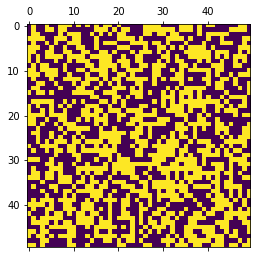

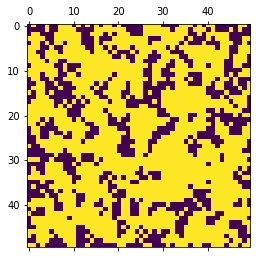

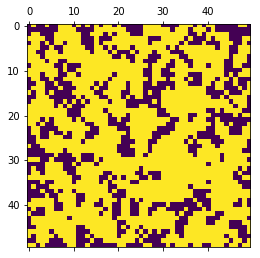

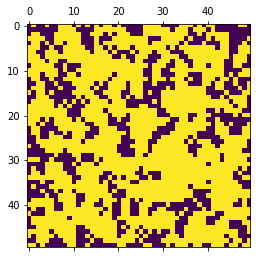

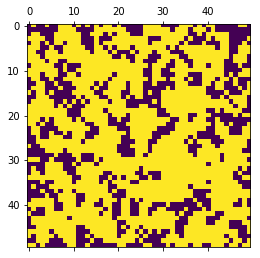

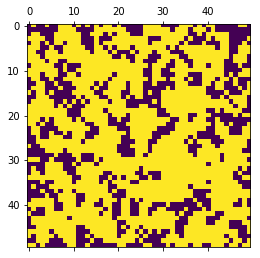

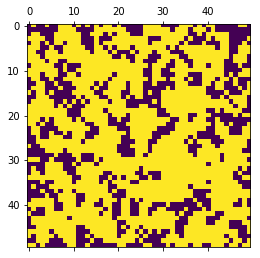

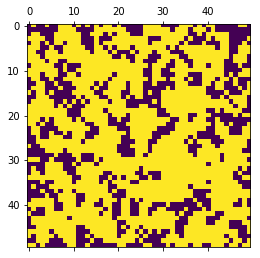

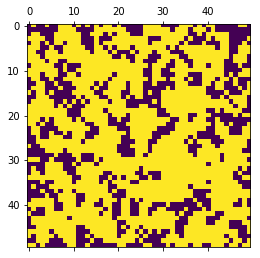

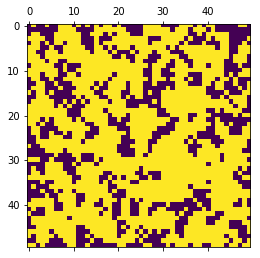

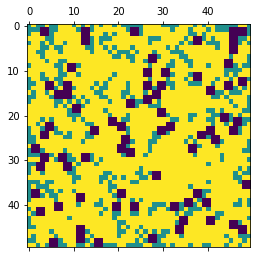

nb pers : 2401


In [141]:
def n_generations(tab_bases,n):
    """ transformation de la ville selon les generation """
    
    ancienneV = tab_bases
    plt.matshow(ancienneV)
    
    for nb in range(0,n-1):

        demenagementDM  = posedemenagement(ancienneV)
        Ldm = Ldemande(ancienneV)
        nouvV = demenagement(demenagementDM,ancienneV,Ldm) 
        ancienneV = nouvV
        print("nombre de demenagement :",len(Ldm))
        
        plt.matshow(nouvV)
    #rajout de la creation de gangs
    plt.matshow(creationDeGang(nouvV))
    plt.show()
    
    print("nb pers :",verifNb(nouvV))
    return 0 

tabF=n_generations(tab_base,10)

***01/04 : AREFIN Finalisation du projet durant les 3 dernieres séances :***
        - amélioration du programme pour montrer l'évolution ( la hausse ) du banditisme dû à la presence de gangs ( modélisation sur plusieurs génération )
        - rédaction de tout les commentaires liés aux programmes 
        - rédaction rapport 
        - mise en place présentation ppw

In [78]:
def verifNb(tabF):
    tab = tabF
    comptR = 0
    comptP = 0
    for i in range(len(tab)) :
        for j in range(len(tab)) :
            if  i+1 <= len(tab) and i-1 >= 0 and  j+1 <= len(tab) and j-1 >= 0:
                if tab[i,j] == 1:
                    comptR = comptR +1
                if tab[i,j] == 0:
                    comptP = comptP +1
    return comptR + comptP
